# Proyecto Modelo BTYD para Acería Guadix SA

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [5]:
import pandas as pd
xls = pd.ExcelFile("/content/drive/My Drive/diplomado/facturacion_original.xlsx")
df = pd.read_excel(xls)
df.head()


,Unnamed: 0,Fecha Doc.,Tipo,Nro. Doc.,Nro. Factura,Estado,Código,Nombre Cliente,Total Neto,Mda.,...,NIT,Teléfono(s),E-Mail,Observaciones,Instrucciones de Envio,Propietario,Código2,Nombre Plantilla,MES,AÑO
0,0,2025-04-30,FFA,100000036,36,VAL,10226,SOCIEDAD MINERA KURMI S.R.L.,3700.0,Bs.,...,170760028,NaN,NaN,ENTREGA TOTAL OT:1838 / 100% CONTRA ENTREGA.,100% CONTRA ENTREGA.\nLUGAR DE ENTREGA: ACERIA...,EMPRESA,1010,SFE - Ventas,abril,2025.0
1,1,2025-04-30,FFA,100000035,35,VAL,10226,SOCIEDAD MINERA KURMI S.R.L.,11550.0,Bs.,...,170760028,NaN,NaN,ENTREGA TOTAL OT:1837 / 100% CONTRA ENTREGA.,"100% CONTRA ENTREGA,\nLUGAR DE ENTREGA: ACERIA...",EMPRESA,1010,SFE - Ventas,abril,2025.0
2,2,2025-04-30,FFA,100000034,34,VAL,10209,COOPERATIVA MINERA AURIFERA YANI R.L.,8400.0,Bs.,...,152142028,NaN,NaN,ENTREGA TOTAL OT:1858 / 100% CONTRA ENTREGA.,100% CONTRA ENTREGA.\nLUGAR DE ENTREGA:ACERIA ...,EMPRESA,1011,SFE - Ventas Fab.y Servicios,abril,2025.0
3,3,2025-04-29,FFA,100000030,30,VAL,10433,VICTOR MARCA VILLCA,136557.0,Bs.,...,5561779,NaN,NaN,"ENTREGA TOTAL OT:1763 / 40% ANTICIPO, 60% CONT...","40% ANTICIPO, 60% CONTRA ENTREGA.\nLUGAR DE EN...",EMPRESA,1010,SFE - Ventas,abril,2025.0
4,4,2025-04-28,FFA,100-000031,2,VAL,10467,SHEILA MARYSOL MONTAÑO ROCA,114000.0,Bs.,...,3859087,NaN,NaN,ENTREGA TOTAL OT 1658,"50% ANTICIPO, 50% CONTRA ENTREGA.\nLUGAR DE EN...",EMPRESA,1010,SFE - Ventas,abril,2025.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Unnamed: 0              947 non-null    int64         
 1   Fecha Doc.              947 non-null    datetime64[ns]
 2   Tipo                    947 non-null    object        
 3   Nro. Doc.               947 non-null    object        
 4   Nro. Factura            947 non-null    int64         
 5   Estado                  947 non-null    object        
 6   Código                  947 non-null    int64         
 7   Nombre Cliente          947 non-null    object        
 8   Total Neto              947 non-null    float64       
 9   Mda.                    947 non-null    object        
 10  Forma Pago              947 non-null    object        
 11  Almacén                 947 non-null    object        
 12  Ref. Tipo               947 non-null    object    

### Preparación Inicial de los Datos

En esta sección se realiza una transformación inicial de los datos extraídos del archivo original de facturación. Se ejecutan los siguientes pasos:

- **Renombrado de columnas**: Se estandarizan los nombres de las columnas a un formato más manejable (`fecha_compra`, `cliente`, `monto`), lo cual facilita su uso en el modelado posterior.
- **Filtrado de columnas relevantes**: Se conserva únicamente la información esencial para el análisis: cliente, fecha de compra y monto.
- **Limpieza básica**:
  - Se eliminan registros con datos faltantes en las columnas `cliente` o `fecha_compra`.
  - Se normalizan los nombres de los clientes a mayúsculas y sin espacios innecesarios.
  - Se convierte la columna `fecha_compra` al formato de fecha reconocido por pandas.
- **Verificación**: Se muestra una vista previa de los primeros registros para comprobar que la estructura y formato de los datos sean adecuados.

Este preprocesamiento es fundamental para asegurar la calidad y consistencia de los datos antes de aplicar cualquier modelo predictivo.


In [10]:
# Renombrar columnas
df = df.rename(columns={
    "Fecha Doc.": "fecha_compra",
    "Nombre Cliente": "cliente",
    "Total Neto": "monto"
})

# Limpieza básica
df = df[["cliente", "fecha_compra", "monto"]]
df = df.dropna(subset=["cliente", "fecha_compra"])
df["cliente"] = df["cliente"].str.upper().str.strip()
df["fecha_compra"] = pd.to_datetime(df["fecha_compra"])

# Vista previa
df.head()

,cliente,fecha_compra,monto
0,SOCIEDAD MINERA KURMI S.R.L.,2025-04-30,3700.0
1,SOCIEDAD MINERA KURMI S.R.L.,2025-04-30,11550.0
2,COOPERATIVA MINERA AURIFERA YANI R.L.,2025-04-30,8400.0
3,VICTOR MARCA VILLCA,2025-04-29,136557.0
4,SHEILA MARYSOL MONTAÑO ROCA,2025-04-28,114000.0


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

### Visualización Exploratoria del Comportamiento de Compra

Esta sección presenta una serie de gráficos orientados a comprender el comportamiento general de los clientes en cuanto a sus compras:

1. **Evolución mensual del monto vendido (Figura 3-7)**  
   Se agrupan las ventas por mes utilizando la fecha de compra y se calcula el monto total vendido en cada periodo. El gráfico de líneas resultante permite observar patrones estacionales, aumentos o disminuciones en la demanda a lo largo del tiempo. Esto puede ayudar a detectar tendencias o ciclos de compra asociados a ciertos meses.

2. **Top 10 clientes por monto acumulado (Figura 3-8)**  
   Se suman los montos facturados por cliente y se visualiza el ranking de los 10 clientes con mayor gasto total. Este gráfico permite identificar rápidamente cuáles son los clientes más valiosos en términos de facturación, y puede servir como base para definir estrategias de fidelización o priorización comercial.

3. **Distribución de montos por transacción (Figura 3-9)**  
   Se utiliza un diagrama de caja (boxplot) para analizar la dispersión de los montos individuales por transacción. Esta visualización ayuda a detectar la presencia de valores atípicos (outliers), la mediana de los montos y el rango intercuartílico. Esta información es útil para evaluar la consistencia de los datos y su impacto en modelos como Gamma-Gamma, que requieren valores monetarios razonablemente estables.

Todos los ejes de los gráficos han sido formateados para mejorar su legibilidad mediante separadores de miles.


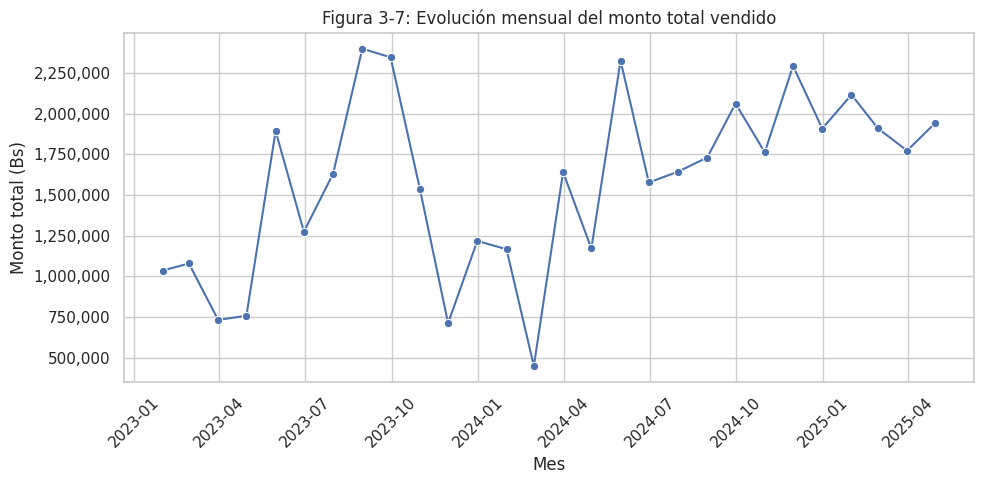

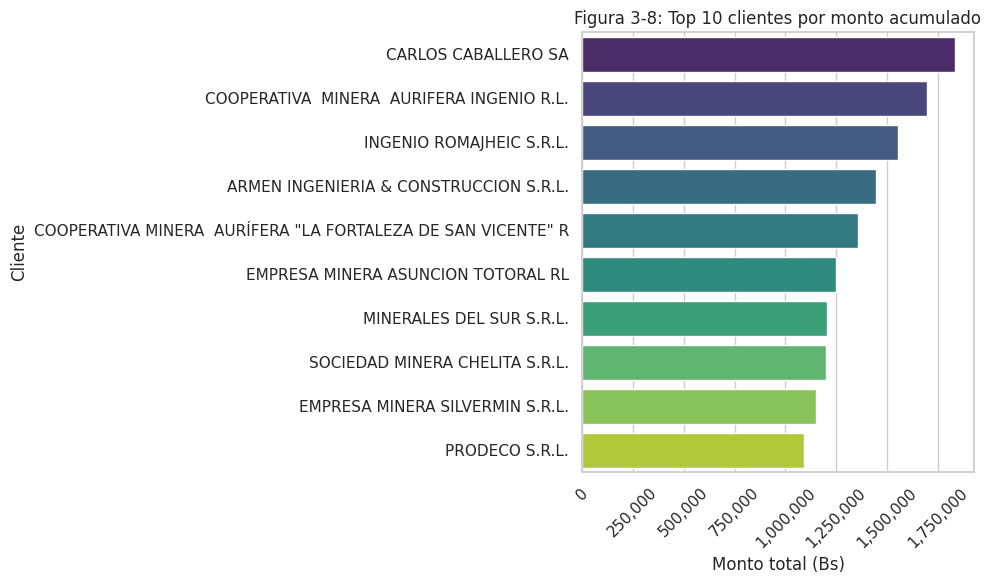

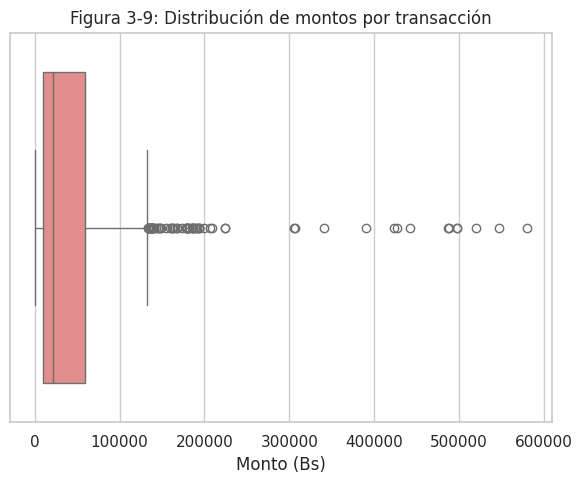

In [ ]:
# ---------------------------
# 1. Evolución mensual del monto vendido
# ---------------------------
df_monthly = df.resample('M', on='fecha_compra')["monto"].sum()

plt.figure(figsize=(10, 5))
sns.lineplot(x=df_monthly.index, y=df_monthly.values, marker="o")
plt.title("Figura 3-7: Evolución mensual del monto total vendido")
plt.xlabel("Mes")
plt.ylabel("Monto total (Bs)")
plt.xticks(rotation=45)
# Aplicar formato legible al eje Y
formatter = FuncFormatter(lambda x, _: f'{int(x):,}')
plt.gca().yaxis.set_major_formatter(formatter)
plt.tight_layout()
plt.savefig("figura_3_7_evolucion_mensual.png")
plt.show()

# ---------------------------
# 2. Top 10 clientes por monto acumulado
# ---------------------------
top_clientes = df.groupby("cliente")["monto"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_clientes.values, y=top_clientes.index, palette="viridis")
plt.title("Figura 3-8: Top 10 clientes por monto acumulado")
plt.xlabel("Monto total (Bs)")
plt.ylabel("Cliente")
# Aplicar formato legible al eje x
formatter = FuncFormatter(lambda x, _: f'{int(x):,}')
plt.gca().xaxis.set_major_formatter(formatter)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("figura_3_8_top_clientes.png")
plt.show()

# ---------------------------
# 3. Boxplot de montos por transacción
# ---------------------------
plt.figure(figsize=(6, 5))
sns.boxplot(data=df, x="monto", color="lightcoral")
plt.title("Figura 3-9: Distribución de montos por transacción")
plt.xlabel("Monto (Bs)")
plt.tight_layout()
plt.savefig("figura_3_9_boxplot_montos.png")
plt.show()

### Instalación de la librería `lifetimes`

Para aplicar modelos de predicción de comportamiento de compra como **Pareto/NBD** y **Gamma-Gamma**, se utiliza la biblioteca `lifetimes`, desarrollada por Cam Davidson-Pilon.

Esta librería contiene implementaciones eficientes y bien documentadas de modelos BTYD (Buy 'Til You Die), especialmente útiles para analizar la recurrencia de clientes y calcular métricas como el Customer Lifetime Value (CLV).

La siguiente celda instala `lifetimes` desde PyPI.  
> **Nota:** Esta instalación solo es necesaria si estás ejecutando este notebook en un entorno donde la librería aún no ha sido instalada.


In [12]:
!pip install lifetimes

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 584.2/584.2 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.7/119.7 kB 10.8 MB/s eta 0:00:00


### Generación de la Tabla Resumen (RFM) por Cliente

A continuación se genera la tabla resumen con métricas clave de comportamiento para cada cliente a partir de los datos transaccionales.

Se utiliza la función `summary_data_from_transaction_data` de la librería `lifetimes`, que transforma el dataset de transacciones en un resumen tipo **RFM**, con las siguientes variables:

- **`frequency`**: Número de compras posteriores a la primera (≥ 0).
- **`recency`**: Tiempo transcurrido entre la primera y la última compra de cada cliente.
- **`T`**: Antigüedad del cliente, es decir, el tiempo desde la primera compra hasta el final del periodo de observación.
- **`monetary_value`** *(opcional)*: Promedio del monto gastado por transacción (no calculado en este paso).

Estas métricas son la base para el entrenamiento del modelo Pareto/NBD y permiten capturar el comportamiento individual de cada cliente en términos de frecuencia, recencia y duración de la relación con la empresa.

> En este caso, no se incluye `monetary_value` ya que se calculará más adelante de forma personalizada.


In [13]:
from lifetimes.utils import summary_data_from_transaction_data

summary = summary_data_from_transaction_data(
    df,
    customer_id_col="cliente",
    datetime_col="fecha_compra",
    monetary_value_col=None,  # opcional
    observation_period_end=df["fecha_compra"].max()
)

summary.head()



,frequency,recency,T
cliente,,,
ACM MINERIA Y METALURGIA LTDA,0.0,0.0,44.0
ADALID CEREZO LOAYZA,1.0,6.0,474.0
ADALID ROJAS CASTELLON,0.0,0.0,720.0
AGREGADOS Y MAQUINARIA PARA LA CONSTRUCCION AGREMAQ LTDA,3.0,155.0,804.0
AGRO NEULAND DEL SUR S.R.L.,0.0,0.0,21.0


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Visualización de las Métricas RFM

En esta sección se visualizan las distribuciones de las tres variables clave que componen el modelo Pareto/NBD, extraídas de la tabla resumen por cliente (`summary`):

1. **Frecuencia (`frequency`)**  
   Representa cuántas veces un cliente ha comprado después de su primera transacción. La mayoría de los clientes tienden a tener una frecuencia baja, lo cual es habitual en entornos industriales o de ciclo largo de compra.

2. **Recencia (`recency`)**  
   Muestra cuánto tiempo ha pasado desde la primera hasta la última compra del cliente. Una recencia baja indica una compra reciente, mientras que una recencia alta sugiere que el cliente no ha comprado en mucho tiempo.

3. **Antigüedad (`T`)**  
   Corresponde al tiempo entre la primera compra del cliente y el final del período de observación. Esta métrica permite contextualizar la recencia y frecuencia, mostrando si el cliente es nuevo o lleva mucho tiempo registrado.

Los tres histogramas permiten evaluar la distribución de estas variables y detectar patrones, como acumulación de clientes con baja frecuencia o alta antigüedad. Esta exploración es clave para entender la base de clientes antes del modelado.

> Todos los gráficos incluyen curvas de densidad (`kde=True`) para facilitar la interpretación visual.


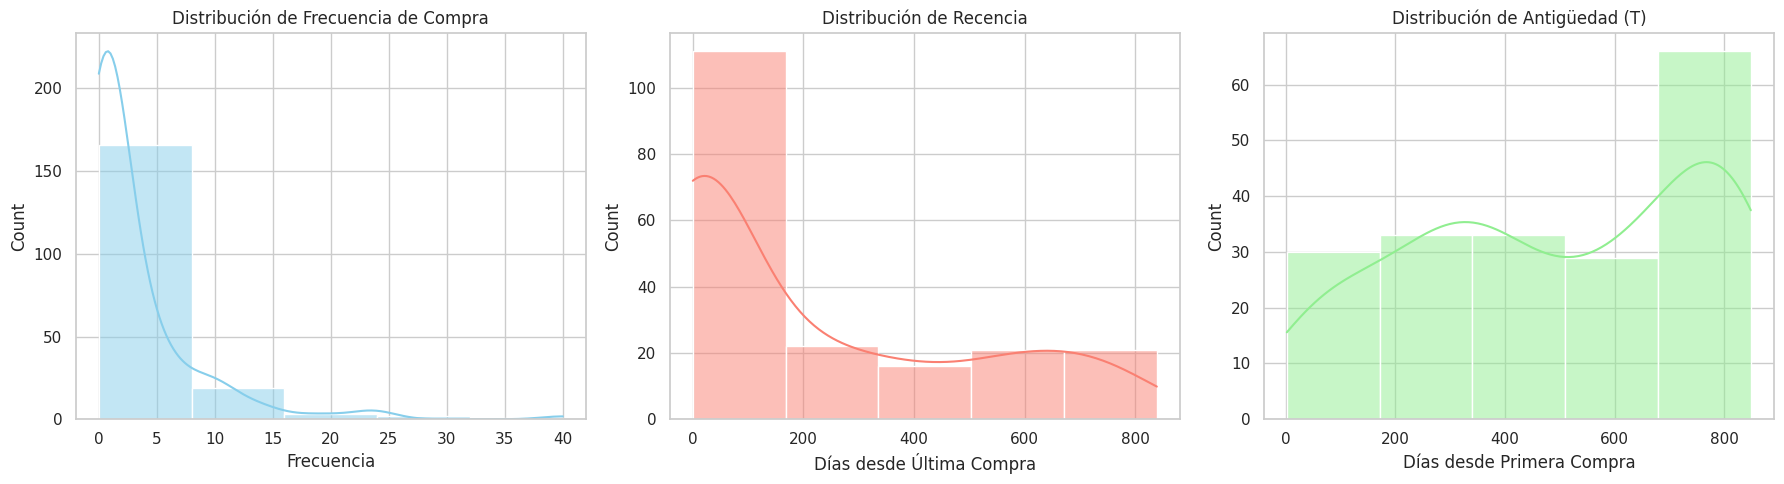

In [15]:
# Estilo de gráficos
sns.set(style="whitegrid")

# Crear figura con tres subgráficos
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Histograma de frecuencia
sns.histplot(summary["frequency"], bins=5, kde=True, ax=axs[0], color='skyblue')
axs[0].set_title("Distribución de Frecuencia de Compra")
axs[0].set_xlabel("Frecuencia")

# Histograma de recencia
sns.histplot(summary["recency"], bins=5, kde=True, ax=axs[1], color='salmon')
axs[1].set_title("Distribución de Recencia")
axs[1].set_xlabel("Días desde Última Compra")

# Histograma de antigüedad
sns.histplot(summary["T"], bins=5, kde=True, ax=axs[2], color='lightgreen')
axs[2].set_title("Distribución de Antigüedad (T)")
axs[2].set_xlabel("Días desde Primera Compra")

plt.tight_layout()
plt.show()

### Filtrado de Clientes para Modelado BTYD

Antes de entrenar el modelo Pareto/NBD, se realiza un paso crucial: **filtrar la base de clientes**.

Se seleccionan únicamente aquellos clientes cuya frecuencia de compra (`frequency`) es mayor a cero, es decir, **clientes que realizaron al menos dos transacciones** (una inicial y al menos una adicional).

Este filtrado es necesario porque:
- Los modelos BTYD, como Pareto/NBD, requieren observar **comportamientos repetidos** para poder estimar patrones de compra.
- Un cliente con una sola compra no proporciona información suficiente para inferir su frecuencia futura o permanencia activa.

El conjunto resultante (`filtered_summary`) se convierte en la base sobre la cual se entrenará el modelo predictivo, excluyendo registros que no contribuyen a una estimación confiable del comportamiento futuro.


In [36]:
# 📦 Continuación desde el paso anterior
from lifetimes import ParetoNBDFitter

# 👉 Filtramos clientes con más de una compra (requisito de BTYD)
filtered_summary = summary[summary['frequency'] > 0]


### Entrenamiento del Modelo Pareto/NBD

En este paso se entrena el modelo **Pareto/NBD** (Negative Binomial Distribution) utilizando los datos filtrados de clientes con más de una compra.

El modelo se ajusta a partir de tres variables principales:

- **`frequency`**: Número de compras repetidas realizadas por cada cliente.
- **`recency`**: Tiempo entre la primera y la última compra.
- **`T`**: Tiempo entre la primera compra y la fecha de corte del análisis.

Se utiliza un **coeficiente de penalización** (`penalizer_coef=0.01`) para evitar el sobreajuste y mejorar la estabilidad numérica durante la estimación de los parámetros del modelo.

Este entrenamiento permite al modelo aprender los patrones de comportamiento de los clientes, específicamente:
- Cuánto tiempo permanece activo un cliente antes de "morir" (inactividad),
- Y con qué frecuencia compra mientras está activo.

El modelo entrenado podrá ser usado posteriormente para predecir tanto la **probabilidad de que un cliente siga activo** como la **cantidad esperada de compras futuras**.


In [37]:
#Entrenar modelo Pareto/NBD
pareto_model = ParetoNBDFitter(penalizer_coef=0.01)
pareto_model.fit(
    filtered_summary['frequency'],
    filtered_summary['recency'],
    filtered_summary['T']
)

<lifetimes.ParetoNBDFitter: fitted with 119 subjects, alpha: 235.94, beta: 1867.16, r: 2.41, s: 1.32>

### Predicción de Compras en los Próximos 180 Días

Una vez entrenado el modelo Pareto/NBD, se utiliza para estimar cuántas compras se espera que realice cada cliente durante los próximos **180 días**.

Esto se logra a través de la función:

```python
conditional_expected_number_of_purchases_up_to_time(t, frequency, recency, T)


In [38]:
#Compras esperadas en los próximos 180 días
filtered_summary['predicted_purchases_180d'] = pareto_model.conditional_expected_number_of_purchases_up_to_time(
    180,
    filtered_summary['frequency'],
    filtered_summary['recency'],
    filtered_summary['T']
)

### Probabilidad de que el Cliente Siga Activo (`prob_alive`)

El modelo Pareto/NBD también permite estimar, para cada cliente, la **probabilidad de que aún esté "vivo" o activo**, es decir, que **siga siendo un comprador potencial**.

Esta probabilidad se calcula utilizando la función:

```python
conditional_probability_alive(frequency, recency, T)


In [39]:
#Probabilidad de que el cliente siga activo
filtered_summary['prob_alive'] = pareto_model.conditional_probability_alive(
    filtered_summary['frequency'],
    filtered_summary['recency'],
    filtered_summary['T']
)

In [40]:
filtered_summary

,frequency,recency,T,predicted_purchases_180d,prob_alive
cliente,,,,,
ADALID CEREZO LOAYZA,1.0,6.0,474.0,0.202892,0.246652
AGREGADOS Y MAQUINARIA PARA LA CONSTRUCCION AGREMAQ LTDA,3.0,155.0,804.0,0.057104,0.063702
ALENAT S.R.L.,4.0,615.0,726.0,1.052075,0.917335
ARIDOS RIO ABAPO S.R.L.,23.0,824.0,840.0,4.034742,0.990541
ARMANDO VILLCA QUISPE,2.0,181.0,334.0,1.091079,0.825726
...,...,...,...,...,...
VIA SUAVE S.R.L.,1.0,33.0,622.0,0.119148,0.174548
VICTOR MARCA VILLCA,3.0,301.0,302.0,1.715271,0.999389
WILLMAN SANDOVAL CASTILLO,10.0,685.0,825.0,1.682807,0.834396


### Estimación del Customer Lifetime Value (CLV) con el Modelo Gamma-Gamma

Luego de estimar la frecuencia y probabilidad de que el cliente siga activo con Pareto/NBD, se procede a calcular el **Customer Lifetime Value (CLV)** utilizando el modelo **Gamma-Gamma**.

#### Paso 1: Cálculo del gasto promedio por cliente
Se agrupa el dataset original (`df`) por cliente y se calcula el **promedio del monto por transacción**, creando una nueva columna llamada `monetary_value`. Esta columna representa cuánto gasta un cliente típicamente cada vez que realiza una compra.

Este valor se combina con la tabla `filtered_summary` para vincularlo a las métricas RFM ya calculadas.

#### Paso 2: Entrenamiento del modelo Gamma-Gamma
Se entrena el modelo Gamma-Gamma sobre aquellos clientes que:
- Tienen más de una compra (`frequency > 0`),
- Y un monto promedio mayor a cero.

El modelo Gamma-Gamma asume que el valor monetario por transacción sigue una distribución gamma y que es **independiente de la frecuencia de compra**, permitiendo estimar el CLV de forma robusta.

#### Paso 3: Estimación del CLV
Con el modelo entrenado, se estima el **Customer Lifetime Value a 6 meses (180 días)** para cada cliente. La función `customer_lifetime_value()` combina:
- La frecuencia esperada y recencia (Pareto/NBD),
- Con el valor monetario promedio (Gamma-Gamma),
- Aplicando una tasa de descuento mensual (`discount_rate = 0.01`).

El resultado se almacena en una nueva columna `clv`, que indica el valor económico esperado que un cliente generará durante los próximos 6 meses.

> Esta métrica permite priorizar a los clientes más rentables y es una herramienta fundamental en la toma de decisiones comerciales estratégicas.


In [41]:
# Agrupar por cliente y calcular el promedio de gasto por transacción
monetary = df.groupby("cliente")["monto"].mean().reset_index()
monetary.columns = ["cliente", "monetary_value"]

# Luego combinas este resultado con la tabla filtered_summary
filtered_summary = filtered_summary.merge(monetary, on="cliente", how="left")

In [42]:
from lifetimes import GammaGammaFitter

# Filtrar para clientes con frequency > 0 y monto promedio > 0
gg_data = filtered_summary[(filtered_summary['frequency'] > 0) & (filtered_summary['monetary_value'] > 0)]

# Ajustar el modelo Gamma-Gamma
gg_model = GammaGammaFitter(penalizer_coef=0.0)
gg_model.fit(gg_data['frequency'], gg_data['monetary_value'])

# Estimar CLV para 180 días
gg_data['clv'] = gg_model.customer_lifetime_value(
    transaction_prediction_model=pareto_model,
    frequency=gg_data['frequency'],
    recency=gg_data['recency'],
    T=gg_data['T'],
    monetary_value=gg_data['monetary_value'],
    time=6,  # meses
    discount_rate=0.01  # tasa de descuento mensual
)

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [43]:
gg_data

,cliente,frequency,recency,T,predicted_purchases_180d,prob_alive,monetary_value,clv
0,ADALID CEREZO LOAYZA,1.0,6.0,474.0,0.202892,0.246652,25598.880000,7429.317677
1,AGREGADOS Y MAQUINARIA PARA LA CONSTRUCCION AG...,3.0,155.0,804.0,0.057104,0.063702,18887.165714,1398.032694
2,ALENAT S.R.L.,4.0,615.0,726.0,1.052075,0.917335,10238.900000,16610.592797
3,ARIDOS RIO ABAPO S.R.L.,23.0,824.0,840.0,4.034742,0.990541,14106.242414,59242.360503
4,ARMANDO VILLCA QUISPE,2.0,181.0,334.0,1.091079,0.825726,11514.510000,23299.140178
...,...,...,...,...,...,...,...,...
114,VIA SUAVE S.R.L.,1.0,33.0,622.0,0.119148,0.174548,20044.800000,3953.273416
115,VICTOR MARCA VILLCA,3.0,301.0,302.0,1.715271,0.999389,67244.666667,109515.338487
116,WILLMAN SANDOVAL CASTILLO,10.0,685.0,825.0,1.682807,0.834396,8996.884737,19021.416076
117,YMS S.R.L.,1.0,212.0,281.0,1.064682,0.946470,40930.500000,49088.325838


In [45]:
gg_data.to_csv('output.csv', index=False)

### Identificación de los 5 Clientes con Mayor CLV

En esta etapa final del análisis, se seleccionan los **5 clientes con mayor Customer Lifetime Value (CLV)** estimado a 6 meses, utilizando los resultados del modelo Gamma-Gamma combinado con Pareto/NBD.

#### Proceso:
- Se ordena la tabla `gg_data` por la columna `clv` en orden descendente.
- Se seleccionan las columnas clave: `cliente`, `clv`, `prob_alive`, `frequency` y `monetary_value`.
- Se realiza un redondeo de valores para facilitar su presentación y comprensión en el informe.
- Finalmente, se exporta la tabla como CSV bajo el nombre `tabla_4_2_top5_clv.csv`.

#### Utilidad:
Esta tabla resume los perfiles más valiosos de la base de clientes según el modelo. Identificar a estos clientes permite:
- Definir acciones de **fidelización prioritaria**,
- Asignar **recursos personalizados** para su mantenimiento,
- Y estimar con mayor precisión la **proyección de ingresos futuros** de la empresa.

> Esta tabla también se incorpora como la **Tabla 4-2** del informe de resultados del proyecto.


In [46]:
# Ordenar por CLV y seleccionar las columnas clave
top_5_clv = gg_data.sort_values("clv", ascending=False).head(5)
top_5_clv = top_5_clv[["cliente", "clv", "prob_alive", "frequency", "monetary_value"]]

# Formatear los valores (opcional, solo si quieres imprimir en consola con estilo)
top_5_clv["clv"] = top_5_clv["clv"].round(2)
top_5_clv["prob_alive"] = top_5_clv["prob_alive"].round(2)
top_5_clv["monetary_value"] = top_5_clv["monetary_value"].round(2)

# Guardar como CSV o imprimir como tabla
top_5_clv.to_csv("tabla_4_2_top5_clv.csv", index=False)
top_5_clv

,cliente,clv,prob_alive,frequency,monetary_value
5,ARMEN INGENIERIA & CONSTRUCCION S.R.L.,477914.13,0.96,4.0,288499.25
20,COOPERATIVA MINERA AURIFERA INGENIO R.L.,292793.27,1.00,11.0,130410.80
48,EMPRESA MINERA ASUNCION TOTORAL RL,248606.44,0.97,10.0,103985.64
25,"COOPERATIVA MINERA AURÍFERA ""LA FORTALEZA DE ...",205262.02,0.93,13.0,90478.14
108,SOCIEDAD MINERA CHELITA S.R.L.,196615.66,0.84,6.0,171550.37


### Visualización de la Distribución del Customer Lifetime Value (CLV)

En esta visualización se representa la **distribución del CLV estimado a 180 días** para todos los clientes que cumplieron con los criterios del modelo Gamma-Gamma (frecuencia > 0 y gasto promedio > 0).

#### Detalles del gráfico:
- Se utiliza un **histograma** para observar cómo se distribuyen los valores del CLV entre los distintos clientes.
- El eje X representa el **valor monetario esperado** que un cliente generará en los próximos 6 meses.
- El eje Y muestra la **cantidad de clientes** que presentan esos niveles de CLV.

#### Propósito:
Este gráfico permite:
- Visualizar la **concentración de valor** en la base de clientes.
- Identificar la existencia de **outliers** con alto CLV.
- Evaluar si la mayoría de los clientes generan ingresos bajos, medios o altos.

> Esta figura se guarda como `figura_4_4_distribucion_clv.png` y es referida en el documento como **Figura 4-4**.


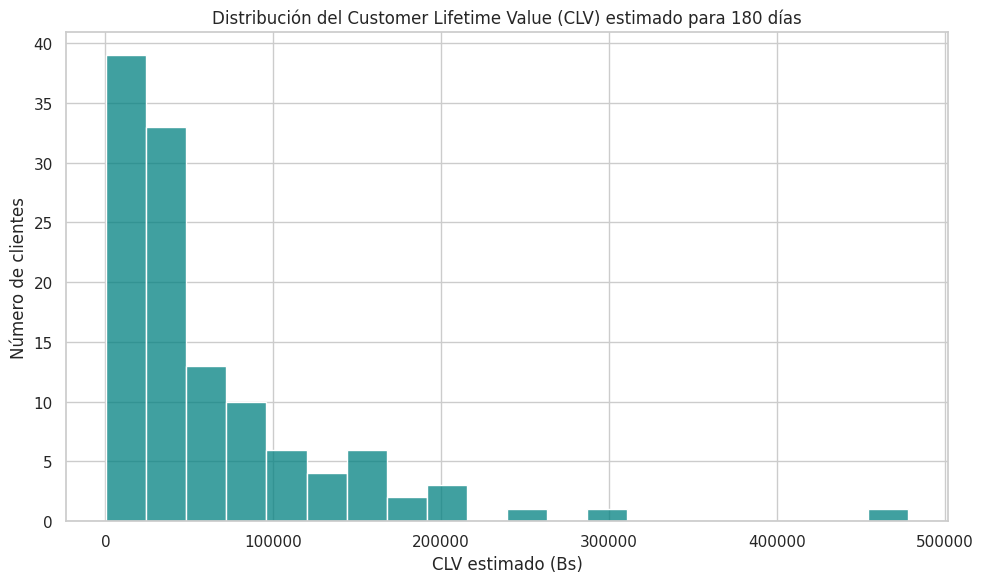

In [47]:
# Asegurarse de que 'clv' es numérico
gg_data["clv"] = pd.to_numeric(gg_data["clv"], errors="coerce")

# Crear el histograma
plt.figure(figsize=(10, 6))
sns.histplot(gg_data["clv"], bins=20, kde=False, color="teal")
plt.title("Distribución del Customer Lifetime Value (CLV) estimado para 180 días")
plt.xlabel("CLV estimado (Bs)")
plt.ylabel("Número de clientes")
plt.grid(True)
plt.tight_layout()
plt.savefig("figura_4_4_distribucion_clv.png")  # Guarda la imagen
plt.show()

### Segmentación de Clientes por Probabilidad de Actividad y Compras Esperadas

Este gráfico de dispersión permite visualizar una **segmentación estratégica** de los clientes en función de dos variables clave:

- **Eje X:** Número esperado de compras en los próximos 180 días (`predicted_purchases_180d`), estimado mediante el modelo Pareto/NBD.
- **Eje Y:** Probabilidad de que el cliente siga activo (`prob_alive`).

#### Características del gráfico:
- Cada punto representa un cliente.
- La línea horizontal gris (valor 0.5 en Y) separa a los clientes con **alta probabilidad de estar activos** (arriba) de los que tienen baja probabilidad (abajo).
- La línea vertical gris marca la **mediana de compras esperadas**, dividiendo a los clientes con **alto potencial de recompra** (derecha) de los que tienen bajo potencial (izquierda).

#### Utilidad:
Este gráfico facilita la identificación de **cuatro segmentos clave**:
1. **Clientes estrella (arriba derecha):** Alta probabilidad de seguir activos y alta cantidad de recompras esperadas.
2. **Clientes prometedores (arriba izquierda):** Probablemente activos, pero con pocas recompras futuras.
3. **Clientes de riesgo (abajo derecha):** Tienen alto valor potencial pero están en riesgo de abandono.
4. **Clientes dormidos (abajo izquierda):** Baja probabilidad de actividad y bajo valor esperado.

> Esta segmentación visual ayuda a definir estrategias personalizadas de retención, fidelización y reactivación.


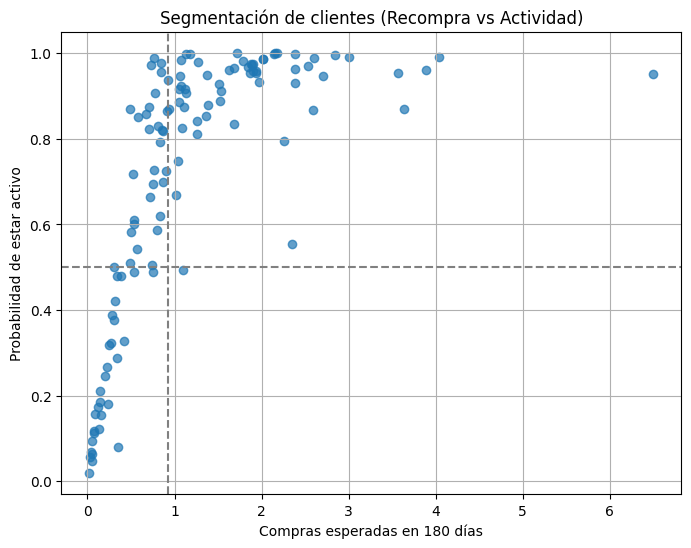

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(
    filtered_summary['predicted_purchases_180d'],
    filtered_summary['prob_alive'],
    alpha=0.7
)
plt.axhline(0.5, color='gray', linestyle='--')
plt.axvline(filtered_summary['predicted_purchases_180d'].median(), color='gray', linestyle='--')
plt.xlabel('Compras esperadas en 180 días')
plt.ylabel('Probabilidad de estar activo')
plt.title('Segmentación de clientes (Recompra vs Actividad)')
plt.grid(True)
plt.show()


### Top 10 Clientes con Mayor Número Esperado de Compras

En esta sección se identifican los **10 clientes con mayor cantidad esperada de compras** en los próximos 180 días, según el modelo Pareto/NBD.

Se ordena la tabla `filtered_summary` por la columna `predicted_purchases_180d` en orden descendente y se seleccionan las columnas más relevantes:

- **`predicted_purchases_180d`**: Número de compras que se espera que realice cada cliente.
- **`prob_alive`**: Probabilidad de que el cliente siga activo durante el periodo proyectado.

#### Objetivo:
Este análisis permite:
- Priorizar a los clientes que probablemente realizarán más transacciones.
- Evaluar si estos clientes también presentan una alta probabilidad de estar activos, lo que refuerza la confianza en las predicciones.
- Identificar oportunidades de negocio mediante atención personalizada o campañas anticipadas de fidelización.

> Esta tabla puede ser utilizada directamente por el área comercial para ejecutar acciones de seguimiento en clientes de alto potencial.


In [51]:
top_10 = filtered_summary.sort_values('predicted_purchases_180d', ascending=False).head(10)
display(top_10[['cliente', 'predicted_purchases_180d', 'prob_alive']])



,cliente,predicted_purchases_180d,prob_alive
105,SICNORTE S.R.L.,6.497325,0.950433
3,ARIDOS RIO ABAPO S.R.L.,4.034742,0.990541
38,EDGAR GONZALO MAMANI MARCA,3.888324,0.960934
36,CORPORACION MINERA DE BOLIVIA,3.632998,0.869532
49,EMPRESA MINERA CHAROLDEPLATA S.R.L.,3.571390,0.954170
67,INDUSTRIA METALURGICA CARLOS CABALLERO SA,3.002913,0.991454
90,PAN AMERICAN SILVER BOLIVIA S.A.,2.841380,0.996367
88,MINERALES DEL SUR S.R.L.,2.707832,0.947229
54,EMPRESA MINERA SILVERMIN S.R.L.,2.598130,0.988631
113,VARMAQ SRL,2.588334,0.866586


### Identificación de Clientes en Riesgo de Pérdida

Esta sección filtra a los **clientes cuya probabilidad de seguir activos es menor al 30%** (`prob_alive < 0.3`). Se considera que estos clientes están en **riesgo de abandono**, lo cual representa una oportunidad crítica para acciones de retención.

Se muestran las columnas:

- **`predicted_purchases_180d`**: Número de recompras esperadas.
- **`prob_alive`**: Probabilidad de que el cliente permanezca activo, ordenada de menor a mayor.

#### Utilidad:
- Permite detectar **clientes valiosos que podrían perderse** si no se interviene a tiempo.
- Facilita el diseño de **campañas preventivas** enfocadas en reactivación.
- Ayuda a comprender el perfil de clientes con bajo engagement reciente o frecuencia baja.

> Este análisis es clave para optimizar los recursos comerciales en intervenciones oportunas que puedan evitar la pérdida de ingresos futuros.


In [52]:
at_risk = filtered_summary[filtered_summary['prob_alive'] < 0.3]
display(at_risk[['cliente', 'predicted_purchases_180d', 'prob_alive']].sort_values('prob_alive'))



,cliente,predicted_purchases_180d,prob_alive
71,INGENIO AZUCARERO GUABIRA S.A.,0.022697,0.018973
11,CARLOS CABALLERO SA,0.047657,0.047827
55,ENRIQUE LUIS CRUZ VILLARROEL,0.031394,0.057417
1,AGREGADOS Y MAQUINARIA PARA LA CONSTRUCCION AG...,0.057104,0.063702
19,CONVISA,0.039538,0.068737
70,INGENIERIA Y CONSTRUCCIONES TECNICAS INCOTEC S.A.,0.347920,0.080152
97,RODRIGO PERROGON CHAVEZ,0.055082,0.094190
101,SARA SANDRA CABRERA MENDIETA,0.072126,0.113538
6,AUSTRAL S.R.L.,0.076314,0.117312
44,EMPRESA CONSTRUCTORA URIZAR ECU S.R.L.,0.132126,0.123230


## Distribución general de compras esperadas
📊 Histograma: ¿cuántos clientes se espera que compren cuántas veces?

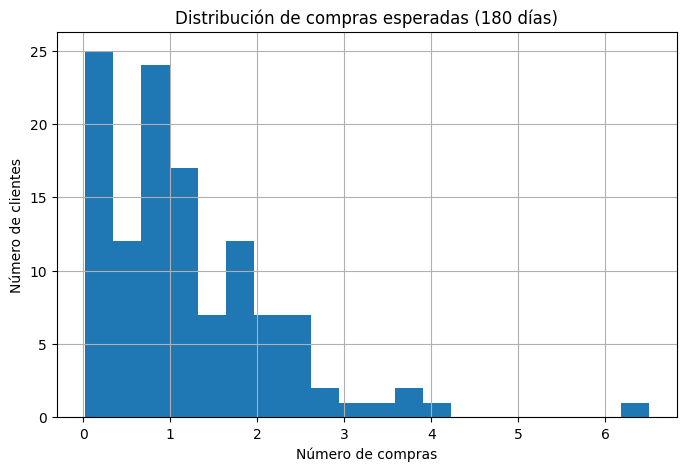

In [ ]:
filtered_summary['predicted_purchases_180d'].hist(bins=20, figsize=(8,5))
plt.title("Distribución de compras esperadas (180 días)")
plt.xlabel("Número de compras")
plt.ylabel("Número de clientes")
plt.show()

### Estimación de la Próxima Fecha de Compra por Cliente

A partir del número esperado de compras en los próximos 180 días (`predicted_purchases_180d`) y la fecha de la última transacción, se estima la **fecha aproximada de la próxima compra** para cada cliente.

#### Pasos realizados:
- Se obtiene la **última fecha de compra** por cliente.
- Se calcula el intervalo promedio entre recompras: `180 días / compras esperadas`.
- Se suma ese intervalo a la última compra para estimar la **fecha siguiente**.
- Luego, se ordenan los clientes por **proximidad de compra**, permitiendo priorizar acciones comerciales.
- Finalmente, se filtran solo las **compras futuras**, descartando predicciones pasadas.

Este análisis permite generar **alertas de contacto proactivo**, anticiparse a la demanda, y focalizar esfuerzos de ventas en clientes que probablemente comprarán pronto.


In [53]:
# Suponiendo que ya tienes 'predicted_purchases_180d' y 'fecha_compra'

# Obtener última compra por cliente
ultima_fecha = df.groupby("cliente")["fecha_compra"].max().reset_index()
ultima_fecha.columns = ["cliente", "fecha_ultima_compra"]

# Unir con predicciones
pred_df = filtered_summary.reset_index().merge(ultima_fecha, on="cliente")

# Estimar días hasta la siguiente compra
pred_df["dias_hasta_siguiente"] = 180 / pred_df["predicted_purchases_180d"]

# Estimar la fecha de la próxima compra
pred_df["fecha_siguiente_estimada"] = pred_df["fecha_ultima_compra"] + pd.to_timedelta(pred_df["dias_hasta_siguiente"], unit="D")

# Ver los resultados
pred_df[["cliente", "fecha_ultima_compra", "predicted_purchases_180d", "fecha_siguiente_estimada"]].head(10)


,cliente,fecha_ultima_compra,predicted_purchases_180d,fecha_siguiente_estimada
0,ADALID CEREZO LOAYZA,2024-01-18,0.202892,2026-06-23 04:07:42.459861633
1,AGREGADOS Y MAQUINARIA PARA LA CONSTRUCCION AG...,2023-07-21,0.057104,2032-03-07 03:08:45.018784104
2,ALENAT S.R.L.,2025-01-09,1.052075,2025-06-29 02:10:18.091061590
3,ARIDOS RIO ABAPO S.R.L.,2025-04-14,4.034742,2025-05-28 14:42:01.121567817
4,ARMANDO VILLCA QUISPE,2024-11-28,1.091079,2025-05-11 23:22:57.913933883
5,ARMEN INGENIERIA & CONSTRUCCION S.R.L.,2025-03-10,1.899585,2025-06-12 18:10:49.847363405
6,AUSTRAL S.R.L.,2023-07-14,0.076314,2029-12-27 16:00:21.657755404
7,AVICONS S.R.L,2025-04-07,0.762886,2025-11-28 22:42:20.190263814
8,BASALCAM S.R.L.,2024-09-25,0.766021,2025-05-17 23:32:05.721967219
9,BENTRADE S.R.L.,2024-06-14,0.488164,2025-06-17 17:28:56.570606100


In [54]:
# Ordenar por la próxima compra más cercana (más reciente)
pred_df_ordenado = pred_df.sort_values(by="fecha_siguiente_estimada", ascending=True)

# Ver los primeros clientes a contactar
pred_df_ordenado[["cliente", "fecha_ultima_compra", "predicted_purchases_180d", "fecha_siguiente_estimada"]].head(10)


,cliente,fecha_ultima_compra,predicted_purchases_180d,fecha_siguiente_estimada
60,FERROVIARIA ORIENTAL S.A.,2024-12-09,2.346611,2025-02-23 16:57:10.908481628
65,HOERBIGER DE ARGENTINA S.A. SUCURSAL BOLIVIA,2024-09-16,1.099887,2025-02-26 15:40:28.083789013
58,FEDERACION DEPARTAMENTAL DE COOPERATIVAS MINER...,2024-08-05,0.835339,2025-03-08 11:33:10.049355227
79,INGENIO MINEROFAUTAR S.R.L.,2024-07-15,0.756161,2025-03-10 01:04:08.399493750
92,PRODECO S.R.L.,2024-12-23,2.262920,2025-03-12 13:02:14.926986862
112,V.M.S.,2024-07-15,0.740695,2025-03-15 00:21:33.165960102
86,MINERA ICHO PAMPITA S.R.L.,2024-09-27,1.011692,2025-03-23 22:04:24.399446940
91,PATRICIA ROCHA SALVATIERRA,2024-08-13,0.804074,2025-03-24 20:38:14.957067638
116,WILLMAN SANDOVAL CASTILLO,2024-12-11,1.682807,2025-03-27 23:08:21.591990271
57,ESTELA CACERES CAMACHANO,2024-11-11,1.258361,2025-04-03 01:02:14.379146286


In [55]:
import datetime

# Fecha actual sin hora
hoy = pd.Timestamp(datetime.date.today())

# Filtrar solo próximas compras estimadas en el futuro
futuras_compras = pred_df[pred_df["fecha_siguiente_estimada"] > hoy]

# Ordenar por la más próxima
futuras_compras_ordenado = futuras_compras.sort_values(by="fecha_siguiente_estimada")

# Mostrar los primeros
futuras_compras_ordenado[["cliente", "fecha_ultima_compra", "predicted_purchases_180d", "fecha_siguiente_estimada"]].head(10)


,cliente,fecha_ultima_compra,predicted_purchases_180d,fecha_siguiente_estimada
88,MINERALES DEL SUR S.R.L.,2025-02-27,2.707832,2025-05-04 11:22:19.837521456
46,EMPRESA DE SERVICIOS MINEROS WAYRACHINAQUINRAY...,2025-01-06,1.516815,2025-05-04 16:04:20.778529748
15,COEXMIN S.R.L.,2024-06-25,0.565945,2025-05-09 01:15:19.450794104
33,COOPERATIVA MINERA PORVENIR R.L.,2024-10-07,0.832742,2025-05-11 03:40:58.951749354
30,COOPERATIVA MINERA AURIFERA SAN PABLO R.L.,2024-09-02,0.714456,2025-05-11 22:33:21.643607191
4,ARMANDO VILLCA QUISPE,2024-11-28,1.091079,2025-05-11 23:22:57.913933883
62,GUMERCINDO CONDARCO SAMBRANA,2025-01-15,1.529112,2025-05-12 17:10:11.288012560
39,ELVIS GUZMAN PRADO,2024-10-15,0.855205,2025-05-13 11:25:10.973264871
16,COMPAÑIA MINERA TIWANACU S.A.,2025-02-12,1.968716,2025-05-14 10:19:25.664426310
28,COOPERATIVA MINERA AURIFERA NUEVA ESPERANZA DE...,2024-06-12,0.533709,2025-05-15 06:18:11.550742724


### Visualización de Validación del Modelo Pareto/NBD

Se presentan dos visualizaciones clave para validar gráficamente el comportamiento del modelo Pareto/NBD:

#### 1. Matriz de Recombras Esperadas (Figura Validación 1)
Esta matriz representa el número esperado de recompras como función de:
- **Frecuencia** (eje X): cantidad de compras previas del cliente,
- **Recencia** (eje Y): cuán recientemente fue su última compra.

La interpretación esperada es:
- Clientes con alta frecuencia y alta recencia (esquinas superiores derechas) deberían tener el mayor número de recompras esperadas.

#### 2. Matriz de Probabilidad de Actividad (Figura Validación 2)
Esta gráfica muestra la **probabilidad de que un cliente siga activo**, también como función de su frecuencia y recencia.

Interpretación esperada:
- Clientes que **compraron recientemente** y con **mayor frecuencia** muestran mayor probabilidad de estar activos (zonas rojas).
- Aquellos que compraron **hace mucho tiempo**, incluso con buena frecuencia, se visualizan con menor probabilidad de estar activos (zonas azules).

Estas visualizaciones sirven como un **diagnóstico visual** de si el modelo está capturando correctamente los patrones típicos de comportamiento del cliente.

> Las figuras son exportadas como `figura_validacion_1_frec_rec.png` y `figura_validacion_2_prob_alive.png` respectivamente.


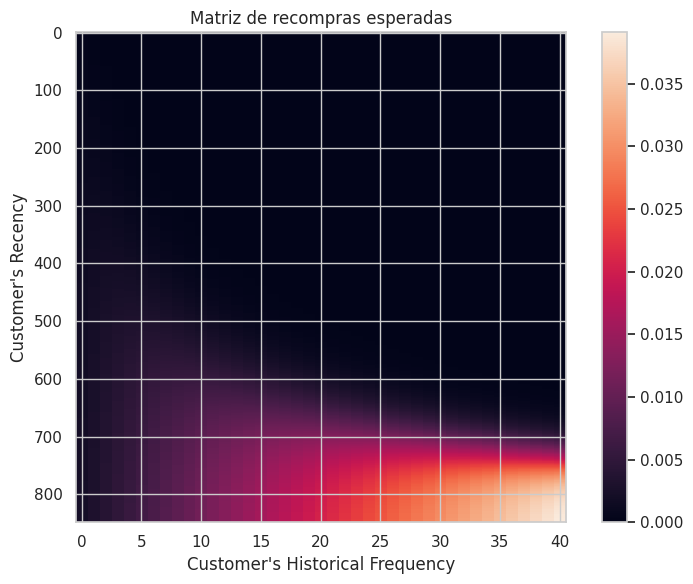

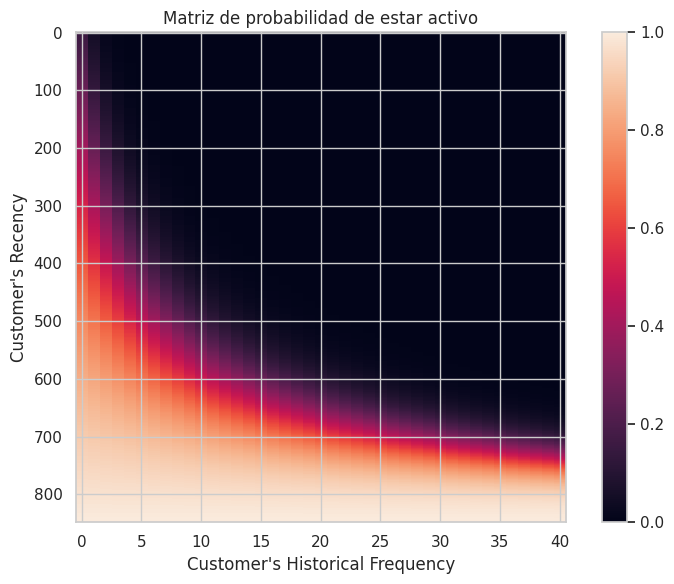

In [56]:
from lifetimes.plotting import plot_frequency_recency_matrix, plot_probability_alive_matrix
import matplotlib.pyplot as plt

# Graficar matriz frecuencia-recencia
plt.figure(figsize=(8, 6))
plot_frequency_recency_matrix(pareto_model)
plt.title("Matriz de recompras esperadas")
plt.tight_layout()
plt.savefig("figura_validacion_1_frec_rec.png")

# Graficar matriz de probabilidad de estar activo
plt.figure(figsize=(8, 6))
plot_probability_alive_matrix(pareto_model)
plt.title("Matriz de probabilidad de estar activo")
plt.tight_layout()
plt.savefig("figura_validacion_2_prob_alive.png")


### Evaluación Cuantitativa del Modelo Pareto/NBD mediante Validación Holdout

Para medir el rendimiento predictivo del modelo de forma cuantitativa (no visual), se aplicó una técnica de **validación temporal tipo holdout**. Este enfoque consiste en:

1. **Dividir el dataset en dos periodos:**
   - **Calibración (entrenamiento):** Hasta el 31 de enero de 2025.
   - **Validación (holdout):** Del 1 de febrero al 30 de abril de 2025 (90 días).

2. **Entrenamiento:**  
   Se entrena el modelo Pareto/NBD solo con los datos del periodo de calibración (frecuencia, recencia y antigüedad hasta enero).

3. **Predicción:**  
   El modelo estima el número esperado de recompras para cada cliente durante el periodo de validación (90 días posteriores).

4. **Evaluación del error:**  
   Se compara la predicción del modelo con las recompras reales ocurridas en ese periodo utilizando el **Error Cuadrático Medio (MSE)**.

```python
Error cuadrático medio (MSE) en validación: 0.693


In [58]:
from lifetimes.utils import calibration_and_holdout_data
from sklearn.metrics import mean_squared_error

# Dividir datos en calibración y validación (usando tu DataFrame original)
cal_hold_data = calibration_and_holdout_data(
    df,
    customer_id_col='cliente',
    datetime_col='fecha_compra',
    calibration_period_end='2025-01-31',     # ajusta según tu caso
    observation_period_end='2025-04-30'      # fecha final del dataset
)

# Entrenar modelo en periodo de calibración
pareto_model.fit(
    cal_hold_data['frequency_cal'],
    cal_hold_data['recency_cal'],
    cal_hold_data['T_cal']
)

# Predicción para periodo de validación (90 días)
cal_hold_data['predicted_holdout'] = pareto_model.conditional_expected_number_of_purchases_up_to_time(
    90,
    cal_hold_data['frequency_cal'],
    cal_hold_data['recency_cal'],
    cal_hold_data['T_cal']
)

# Comparar predicción vs compras reales
mse = mean_squared_error(cal_hold_data['frequency_holdout'], cal_hold_data['predicted_holdout'])
print("Error cuadrático medio (MSE) en validación:", round(mse, 3))


Error cuadrático medio (MSE) en validación: 0.693


Un MSE de **0.693** indica que el modelo está funcionando bien para predecir recompras individuales en el corto plazo, y puede ser utilizado con confianza para segmentación, estimación de demanda y planificación comercial.